In [1]:
import pandas as pd

# Carrega o dataset CSV
df = pd.read_csv('data/ERENO-2.0-100K.csv')

# Visualiza as primeiras linhas
print(df.head())

      Time      isbA      isbB      isbC      vsbA      vsbB      vsbC  \
0  0.03885 -0.026538 -0.035877  0.060486 -0.039338  0.077393 -0.038062   
1  0.03885 -0.026538 -0.035877  0.060486 -0.039338  0.077393 -0.038062   
2  0.37464  0.029923 -0.076646  0.045858 -0.095898  0.055355  0.040523   
3  0.50337  0.432347 -0.113172 -0.138316  0.014902  0.082498 -0.079844   
4   0.7602  0.106018 -0.152017  0.015963 -0.070272 -0.022661  0.092251   

  isbARmsValue isbBRmsValue isbCRmsValue  ... sqDiff gooseLengthDiff  \
0     0.029459     0.025651     0.029991  ...    0.0             0.0   
1     0.029459     0.025651     0.029991  ...    0.0             0.0   
2     0.048988     0.053399     0.052915  ...   86.0             0.0   
3     0.154143     0.057803     0.062056  ...  -67.0             0.0   
4     0.110327     0.108409     0.071887  ...   42.0             0.0   

  cbStatusDiff apduSizeDiff frameLengthDiff timestampDiff        tDiff  \
0          0.0          0.0             0.0     

C:\Users\henri\AppData\Local\Temp\ipykernel_31840\1003884592.py:4: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('data/ERENO-2.0-100K.csv')


In [2]:
from sklearn.preprocessing import LabelEncoder

# Faz uma cópia do dataframe para não alterar o original
df_encoded = df.copy()

# Aplica LabelEncoder em todas as colunas que não são numéricas
for col in df_encoded.columns:
    if df_encoded[col].dtype == 'object':
        le = LabelEncoder()
        df_encoded[col] = le.fit_transform(df_encoded[col].astype(str))

# Agora pode separar X e y normalmente
X = df_encoded.iloc[:, :-1].values
y = df_encoded.iloc[:, -1].values

In [3]:
from sklearn.model_selection import KFold, cross_val_predict
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

# Define o classificador a ser usado
clf = DecisionTreeClassifier()

kf = KFold(n_splits=10, shuffle=True, random_state=42)
y_pred = cross_val_predict(clf, X, y, cv=kf)

# Calcula matriz de confusão e acurácia
ac = accuracy_score(y, y_pred)
cm = confusion_matrix(y, y_pred)

In [4]:
print(f"Acurácia: {ac}")

Acurácia: 0.9067642412972627


[[12638     1     0     1     0     4     0  7086     0   269]
 [    0 19992     0     0     0     3     0     1     4     0]
 [    1     0 19974     2     3     7     0     7     0     6]
 [    1     0     0 19953     0     0     0     8     2    36]
 [    3     0     0     0 19995     1     0     1     0     0]
 [    5     1     2     0     8 19958     0    14     0    12]
 [    0     0     0     0     0     0    54     0     0     0]
 [ 7343     1     1     7     0     4     0 30936     0  1707]
 [    0     1     0     1     0     0     0     0 19996     2]
 [  302     0     0    49     0    17     0  1728     0 17904]]


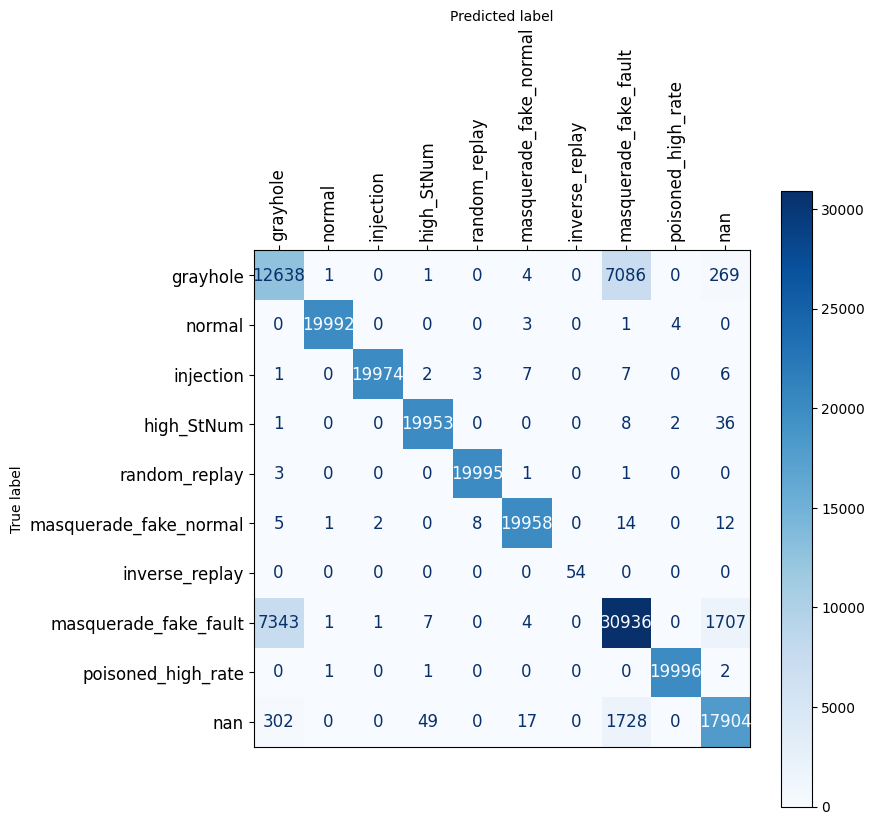

In [5]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

print(cm)

# Pegue os nomes das classes originais
class_names = df.iloc[:, -1].unique()

fig, ax = plt.subplots(figsize=(8, 8))

# Passe os nomes das classes para display_labels
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(cmap=plt.cm.Blues, ax=ax, values_format='d')
ax.xaxis.set_ticks_position('top')
ax.xaxis.set_label_position('top')
plt.xticks(fontsize=12, rotation=90)
plt.yticks(fontsize=12)
for text in disp.text_.ravel():
    text.set_fontsize(12)

plt.show()

## Printando Decision Tree


In [6]:
from sklearn.tree import DecisionTreeClassifier, export_text

clf = DecisionTreeClassifier(min_samples_split=5)
clf.fit(X, y)

feature_names = df_encoded.columns[:-1].tolist()
class_names = df.iloc[:, -1].unique().astype(str).tolist()

r = export_text(clf, feature_names=feature_names, show_weights=True)

# Substitui "class: X" pelo nome da classe correspondente
for idx, name in enumerate(class_names):
    r = r.replace(f"class: {idx}", f"class: {name}")

print("Classes:", class_names)
print(r)

Classes: ['grayhole', 'normal', 'injection', 'high_StNum', 'random_replay', 'masquerade_fake_normal', 'inverse_replay', 'masquerade_fake_fault', 'poisoned_high_rate', 'nan']
|--- confRev <= 1.50
|   |--- timeFromLastChange <= 112.95
|   |   |--- StNum <= 2004.00
|   |   |   |--- StNum <= 729.50
|   |   |   |   |--- cbStatus <= 0.50
|   |   |   |   |   |--- timestampDiff <= 0.00
|   |   |   |   |   |   |--- t <= 3804.38
|   |   |   |   |   |   |   |--- stDiff <= 0.50
|   |   |   |   |   |   |   |   |--- GooseTimestamp <= 1705.12
|   |   |   |   |   |   |   |   |   |--- t <= 897.61
|   |   |   |   |   |   |   |   |   |   |--- stDiff <= -1.00
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 2
|   |   |   |   |   |   |   |   |   |   |--- stDiff >  -1.00
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 7
|   |   |   |   |   |   |   |   |   |--- t >  897.61
|   |   |   |   |   |   |   |   |   |   |--- StNum <= 55.00
|   |   |   |   |   |   